In [2]:
import os
import sys
sys.path.append("..")  # add top folder to path

from pathlib import Path

import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from tinymolecule.utils.docking import generate_logs_table

## Data loading

In [25]:
plots_path = Path("/Users/Munchic/Developer/Capstone/tinymolecule/data/plots")

BASE_DIR = Path("../data/pdb_out")

logs_ccr5 = pd.read_csv("../data/out/gen/wt_ccr5/summary.csv")
logs_ccr2 = pd.read_csv("../data/out/gen/ccr2/summary.csv")
logs_ccr1 = pd.read_csv("../data/out/gen/ccr1/summary.csv")
logs_ccr3 = pd.read_csv("../data/out/gen/ccr3/summary.csv")
logs_ccr9 = pd.read_csv("../data/out/gen/ccr9/summary.csv")
logs_ccr6 = pd.read_csv("../data/out/gen/ccr6/summary.csv")


total_molecules = len(logs_ccr5)
logs_ccr5.head()  # preview

,Unnamed: 0,affin_kcal_mol-1_1,affin_kcal_mol-1_2,affin_kcal_mol-1_3,affin_kcal_mol-1_4,affin_kcal_mol-1_5,affin_kcal_mol-1_6,affin_kcal_mol-1_7,affin_kcal_mol-1_8,affin_kcal_mol-1_9,...,best_dist_rmsd_ub_2,best_dist_rmsd_ub_3,best_dist_rmsd_ub_4,best_dist_rmsd_ub_5,best_dist_rmsd_ub_6,best_dist_rmsd_ub_7,best_dist_rmsd_ub_8,best_dist_rmsd_ub_9,best_dist_rmsd_ub_10,uuid
0,0,-10.1,-9.7,-9.6,-9.3,-9.0,-8.9,-8.7,-8.7,-8.5,...,3.376,3.601,10.824,9.792,11.498,10.163,11.051,7.956,10.155,23648f4b
1,1,-11.0,-10.9,-10.7,-10.6,-10.4,-10.3,-10.3,-10.2,-10.1,...,2.010,5.053,2.328,3.817,9.623,4.844,3.776,10.807,2.042,0dc7c743
2,2,-10.2,-9.7,-9.7,-9.3,-9.2,-9.2,-9.2,-9.1,-9.0,...,3.338,3.650,9.134,7.707,3.899,3.883,7.022,8.690,8.894,024e3700
3,3,-8.5,-8.2,-8.2,-8.1,-7.9,-7.7,-7.4,-7.3,-7.3,...,3.805,1.809,1.528,2.556,6.014,8.736,6.331,8.252,2.503,fdbbf6e6
4,4,-10.3,-9.4,-9.4,-9.3,-9.3,-8.8,-8.7,-8.5,-8.4,...,2.573,3.747,2.590,3.866,3.847,8.921,4.950,4.934,4.918,2b6194b9


## Data validation
### Make sure that CCR5 best binding modes don't have any outliers

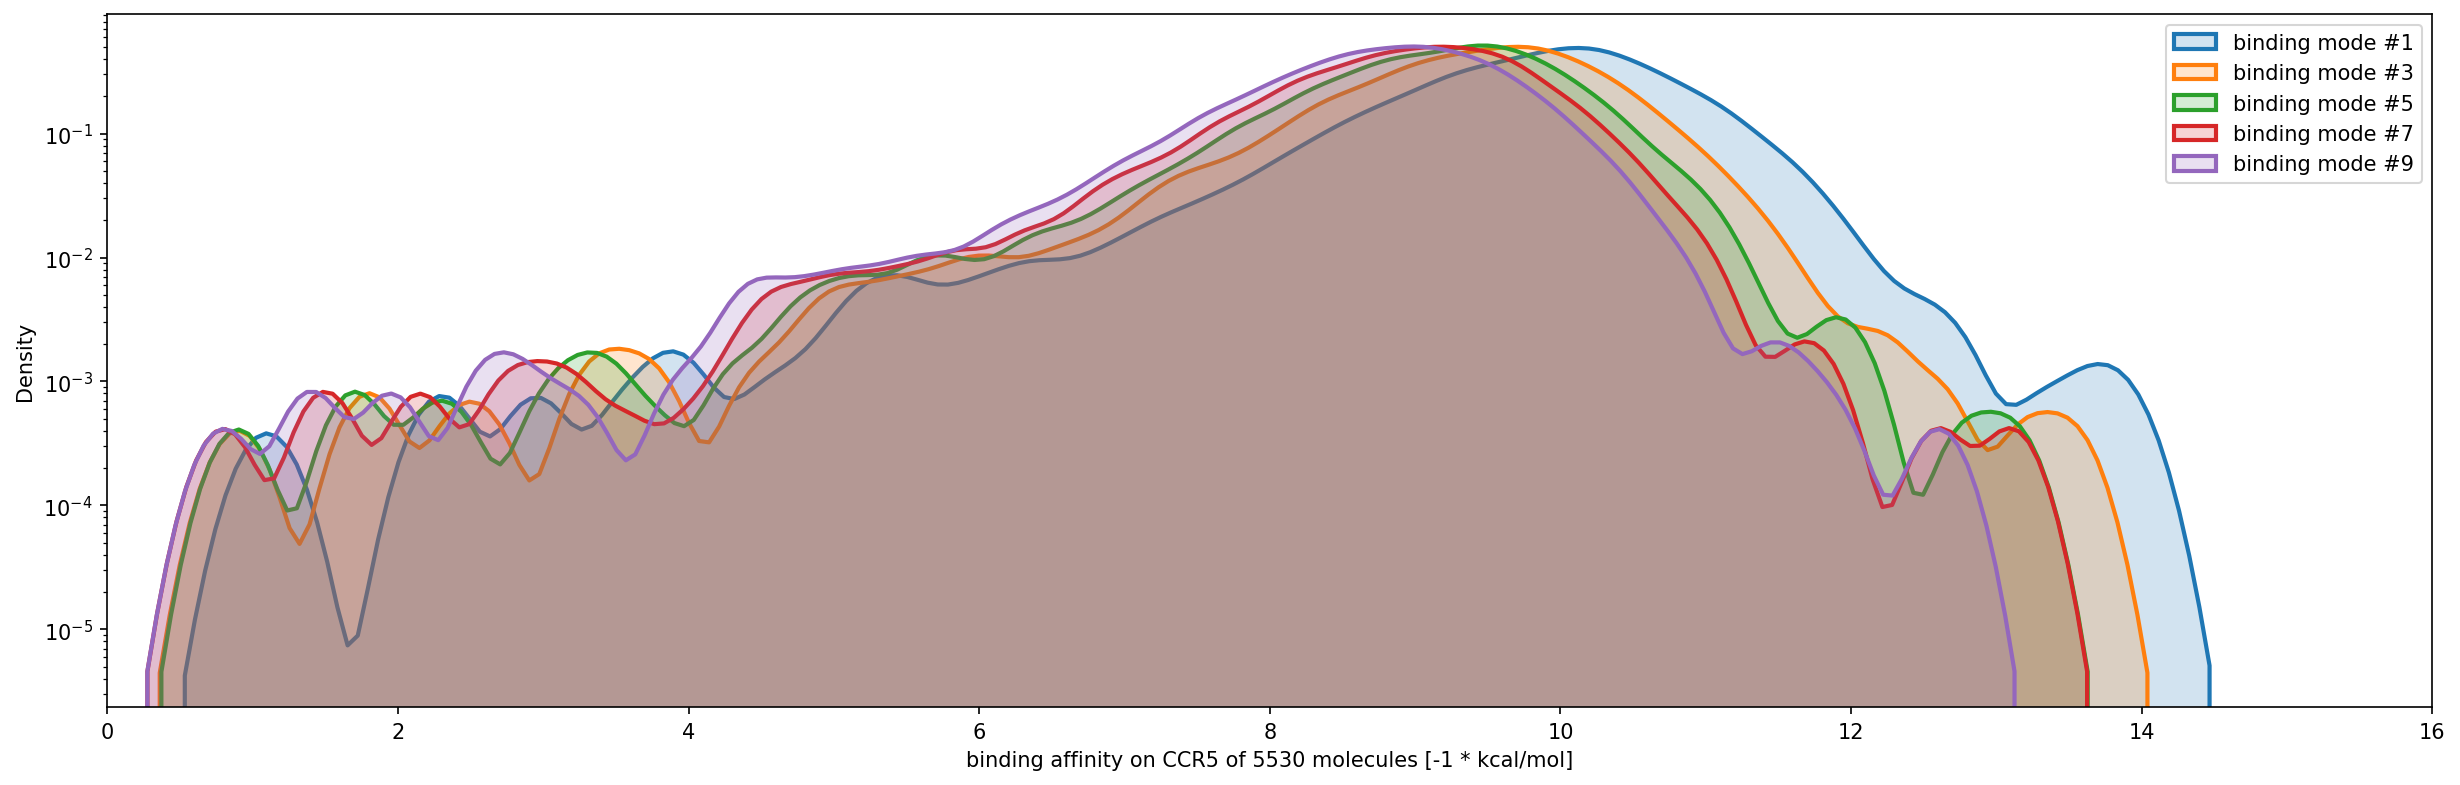

In [27]:
plt.style.use('default')
plt.figure(figsize=(20, 6), dpi=150)

sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="binding mode #1", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_3"] * (-1), linewidth=2, label="binding mode #3", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_5"] * (-1), linewidth=2, label="binding mode #5", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_7"] * (-1), linewidth=2, label="binding mode #7", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_9"] * (-1), linewidth=2, label="binding mode #9", fill=True, alpha=.2)

plt.yscale("log")
plt.xlim(0, 16)
plt.xlabel(f"binding affinity on CCR5 of {total_molecules} molecules [-1 * kcal/mol]")
plt.legend()
plt.show()

### CCR2 sanity check

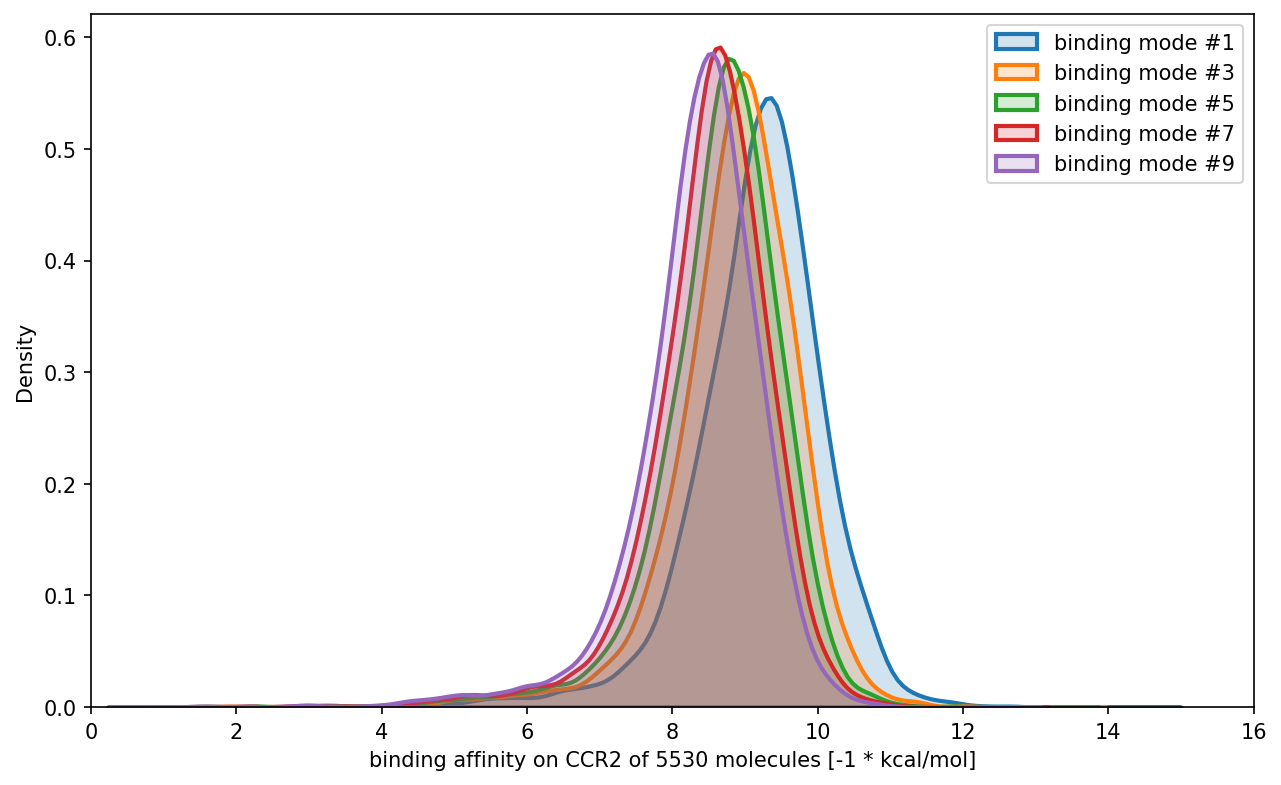

In [5]:
plt.figure(figsize=(10, 6), dpi=150)

sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="binding mode #1", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_3"] * (-1), linewidth=2, label="binding mode #3", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_5"] * (-1), linewidth=2, label="binding mode #5", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_7"] * (-1), linewidth=2, label="binding mode #7", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_9"] * (-1), linewidth=2, label="binding mode #9", fill=True, alpha=.2)

plt.xlim(0, 16)
plt.xlabel(f"binding affinity on CCR2 of {total_molecules} molecules [-1 * kcal/mol]")
plt.legend()
plt.show()

## Comparison
### Best binding mode

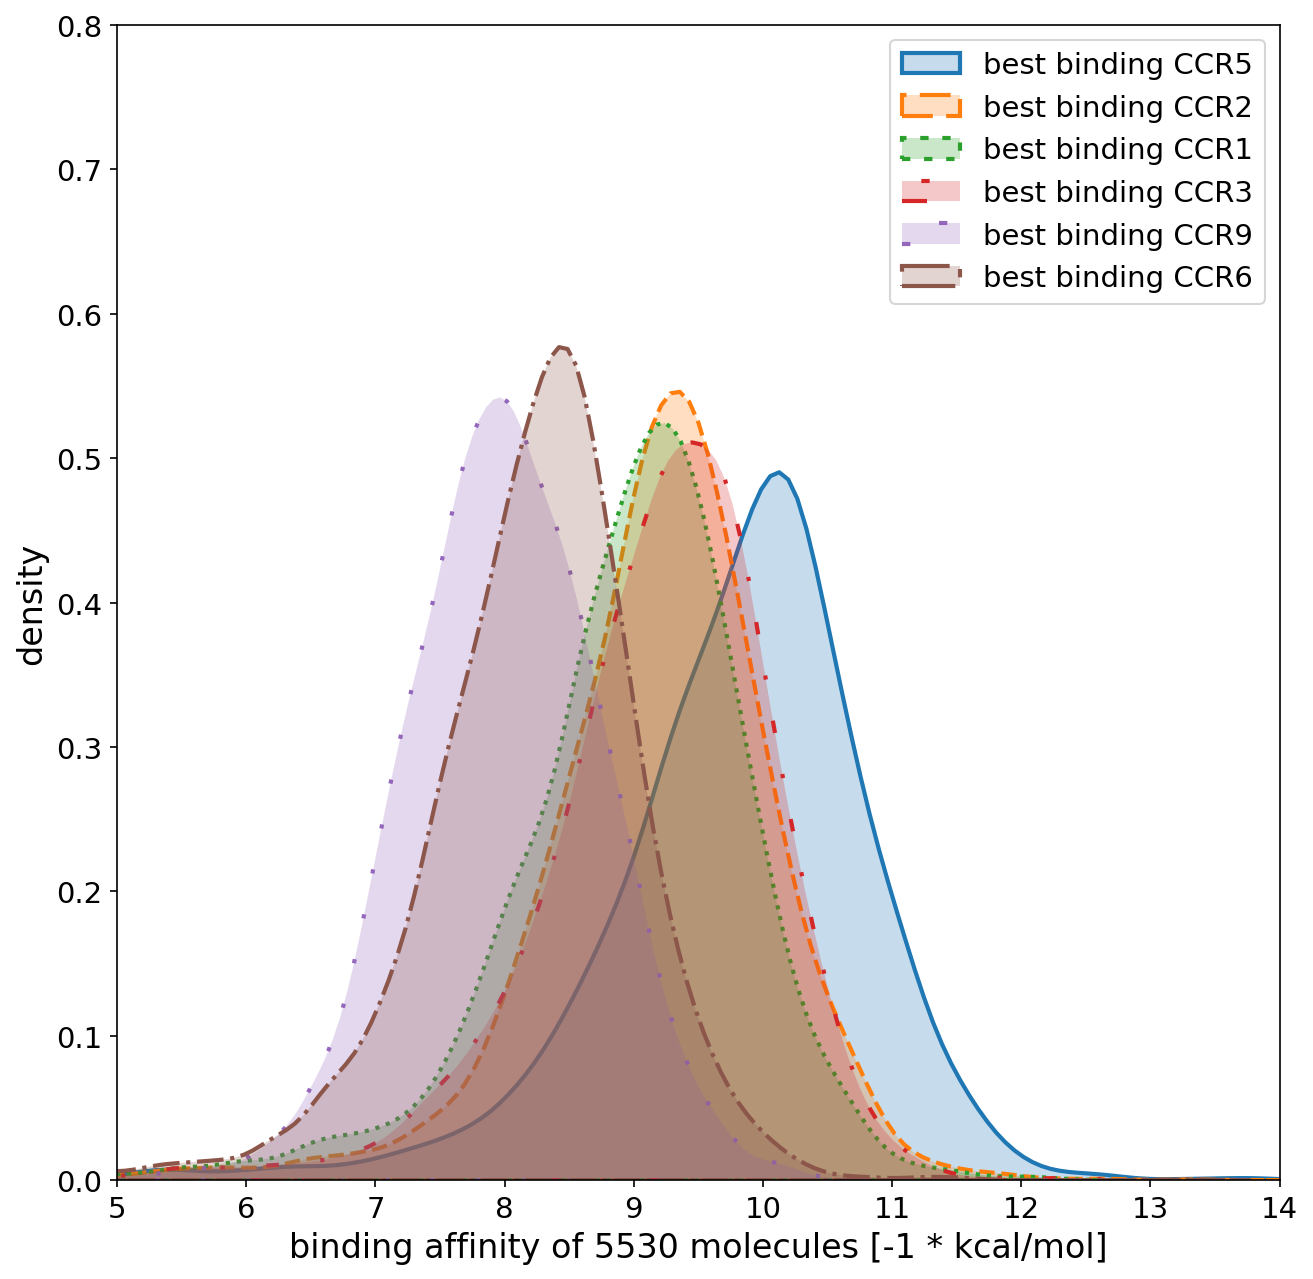

In [11]:
plt.style.use('default')
plt.figure(figsize=(10, 10), dpi=150)

sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR5", fill=True)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR2", fill=True, linestyle="--")
sns.kdeplot(data=logs_ccr1["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR1", fill=True, linestyle=":")
sns.kdeplot(data=logs_ccr3["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR3", fill=True, linestyle=(0, (3, 10, 1, 10)))
sns.kdeplot(data=logs_ccr9["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR9", fill=True, linestyle=(0, (1, 10)))
sns.kdeplot(data=logs_ccr6["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR6", fill=True, linestyle="-.")


plt.ylim(0, 0.8)
plt.xlim(5, 14)
plt.ylabel("density", size=16)
plt.xlabel(f"binding affinity of {total_molecules} molecules [-1 * kcal/mol]", size=16)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig(plots_path / "baff-ccr5-vs-off.png")
plt.show()

In [24]:
def stats_report(baff_data):
    report = {}
    report["mean"] = np.mean(baff_data)
    report["median"] = np.mean(baff_data)
    report["std"] = np.std(baff_data)
    report["var"] = report["std"]**2
    report["95ci"] = stats.norm.interval(0.95, loc=report["mean"], scale=report["std"])

    return report

print("ccr_2:", stats_report(logs_ccr2["affin_kcal_mol-1_1"]))
print("ccr_1:", stats_report(logs_ccr1["affin_kcal_mol-1_1"]))
print("ccr_3:", stats_report(logs_ccr3["affin_kcal_mol-1_1"]))
print("ccr_9:", stats_report(logs_ccr9["affin_kcal_mol-1_1"]))
print("ccr_6:", stats_report(logs_ccr6["affin_kcal_mol-1_1"]))
print("ccr_5:", stats_report(logs_ccr5["affin_kcal_mol-1_1"]))

ccr_2: {'mean': -9.179475587703436, 'median': -9.179475587703436, 'std': 0.9343050602488309, 'var': 0.8729259456065714, '95ci': (-11.01067985636467, -7.348271319042203)}
ccr_1: {'mean': -8.971681735985532, 'median': -8.971681735985532, 'std': 0.9605966876672037, 'var': 0.9227459963572033, '95ci': (-10.854416647481722, -7.088946824489342)}
ccr_3: {'mean': -9.170813743218808, 'median': -9.170813743218808, 'std': 0.9507710146351943, 'var': 0.9039655222704369, '95ci': (-11.034290689448394, -7.3073367969892224)}
ccr_9: {'mean': -7.979493670886077, 'median': -7.979493670886077, 'std': 0.7777180165401092, 'var': 0.6048453132510816, '95ci': (-9.503792973432617, -6.455194368339537)}
ccr_6: {'mean': -8.207251356238698, 'median': -8.207251356238698, 'std': 0.869443007314639, 'var': 0.7559311429683233, '95ci': (-9.911328337185585, -6.503174375291811)}
ccr_5: {'mean': -9.797558770343581, 'median': -9.797558770343581, 'std': 1.0590347581923878, 'var': 1.1215546190596093, '95ci': (-11.873228754776747

### Correlation of binding affinity

In [18]:
combined_logs = pd.merge(logs_ccr1, pd.merge(logs_ccr5, logs_ccr2, on="uuid"), on="uuid")
combined_logs.head()

,Unnamed: 0,affin_kcal_mol-1_1,affin_kcal_mol-1_2,affin_kcal_mol-1_3,affin_kcal_mol-1_4,affin_kcal_mol-1_5,affin_kcal_mol-1_6,affin_kcal_mol-1_7,affin_kcal_mol-1_8,affin_kcal_mol-1_9,...,best_dist_rmsd_ub_1_y,best_dist_rmsd_ub_2_y,best_dist_rmsd_ub_3_y,best_dist_rmsd_ub_4_y,best_dist_rmsd_ub_5_y,best_dist_rmsd_ub_6_y,best_dist_rmsd_ub_7_y,best_dist_rmsd_ub_8_y,best_dist_rmsd_ub_9_y,best_dist_rmsd_ub_10_y
0,0,-9.4,-9.3,-8.9,-8.7,-8.7,-8.5,-8.4,-8.2,-8.1,...,0.0,9.086,9.370,8.706,9.672,10.633,9.403,8.902,9.137,10.082
1,1,-8.7,-8.7,-8.6,-8.6,-8.6,-8.3,-8.2,-8.2,-8.1,...,0.0,3.235,2.676,8.761,6.910,5.527,6.172,3.679,6.069,5.800
2,2,-9.0,-8.8,-8.7,-8.5,-8.4,-8.3,-8.3,-8.2,-8.1,...,0.0,5.809,4.794,7.003,3.750,4.180,7.581,8.549,6.138,7.144
3,3,-8.0,-8.0,-7.8,-7.7,-7.7,-7.5,-7.5,-7.4,-7.4,...,0.0,9.272,4.230,3.274,1.893,9.169,7.760,4.330,8.455,8.209
4,4,-8.6,-8.6,-8.4,-8.3,-8.2,-7.8,-7.7,-7.6,-7.5,...,0.0,6.450,8.681,9.058,3.013,3.644,3.280,6.302,8.275,8.860


/Users/Munchic/miniconda3/envs/tinymolecule/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 660x660 with 0 Axes>

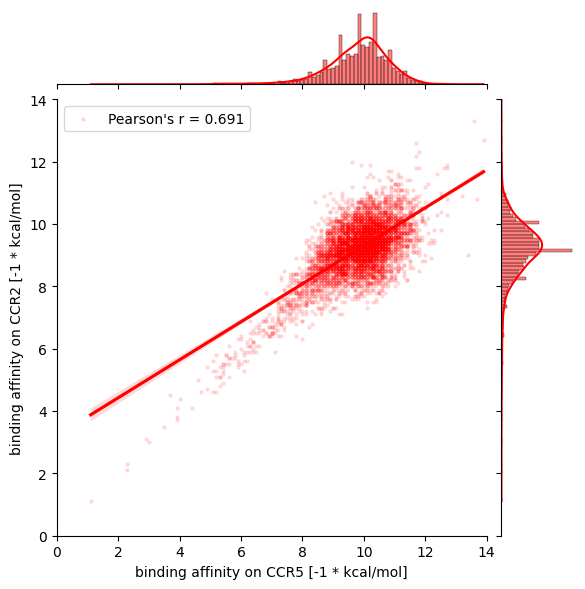

In [19]:
plt.figure(figsize=(2, 2), dpi=330)

x = combined_logs["affin_kcal_mol-1_1_x"] * (-1)
y = combined_logs["affin_kcal_mol-1_1_y"] * (-1)
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}", color="red", scatter_kws={"alpha": 0.1, "s": 5})

plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"binding affinity on CCR2 [-1 * kcal/mol]")
plt.ylim(0, 14)
plt.xlim(0, 14)
plt.legend()
plt.show()

/Users/Munchic/miniconda3/envs/tinymolecule/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 660x660 with 0 Axes>

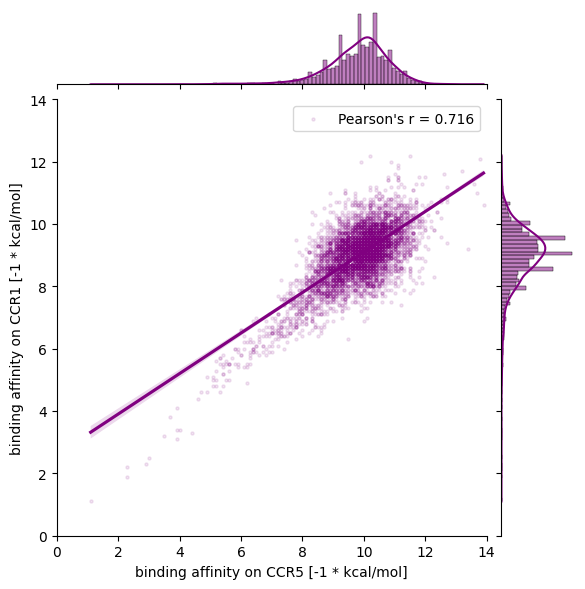

In [52]:
plt.figure(figsize=(2, 2), dpi=330)

x = combined_logs["affin_kcal_mol-1_1_x"] * (-1)
y = combined_logs["affin_kcal_mol-1_1"] * (-1)
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}", color="purple", scatter_kws={"alpha": 0.1, "s": 5})

plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"binding affinity on CCR1 [-1 * kcal/mol]")
plt.ylim(0, 14)
plt.xlim(0, 14)
plt.legend()
plt.show()

In [31]:
plt.figure(figsize=(2, 2), dpi=330)

x = combined_logs["affin_kcal_mol-1_1_x"] * (-1)
y = combined_logs["affin_kcal_mol-1_1_z"] * (-1)
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}", color="red")

plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"binding affinity on CCR1 [-1 * kcal/mol]")
plt.legend()
plt.show()

KeyError: 'affin_kcal_mol-1_1_z'

<Figure size 660x660 with 0 Axes>

In [55]:
combined_logs = pd.merge(logs_ccr5, logs_ccr2, on="uuid")
combined_logs.head()

,Unnamed: 0_x,affin_kcal_mol-1_1_x,affin_kcal_mol-1_2_x,affin_kcal_mol-1_3_x,affin_kcal_mol-1_4_x,affin_kcal_mol-1_5_x,affin_kcal_mol-1_6_x,affin_kcal_mol-1_7_x,affin_kcal_mol-1_8_x,affin_kcal_mol-1_9_x,...,best_dist_rmsd_ub_1_y,best_dist_rmsd_ub_2_y,best_dist_rmsd_ub_3_y,best_dist_rmsd_ub_4_y,best_dist_rmsd_ub_5_y,best_dist_rmsd_ub_6_y,best_dist_rmsd_ub_7_y,best_dist_rmsd_ub_8_y,best_dist_rmsd_ub_9_y,best_dist_rmsd_ub_10_y
0,0,-10.1,-9.7,-9.6,-9.3,-9.0,-8.9,-8.7,-8.7,-8.5,...,0.0,9.086,9.370,8.706,9.672,10.633,9.403,8.902,9.137,10.082
1,1,-11.0,-10.9,-10.7,-10.6,-10.4,-10.3,-10.3,-10.2,-10.1,...,0.0,3.235,2.676,8.761,6.910,5.527,6.172,3.679,6.069,5.800
2,2,-10.2,-9.7,-9.7,-9.3,-9.2,-9.2,-9.2,-9.1,-9.0,...,0.0,5.809,4.794,7.003,3.750,4.180,7.581,8.549,6.138,7.144
3,3,-8.5,-8.2,-8.2,-8.1,-7.9,-7.7,-7.4,-7.3,-7.3,...,0.0,9.272,4.230,3.274,1.893,9.169,7.760,4.330,8.455,8.209
4,4,-10.3,-9.4,-9.4,-9.3,-9.3,-8.8,-8.7,-8.5,-8.4,...,0.0,6.450,8.681,9.058,3.013,3.644,3.280,6.302,8.275,8.860


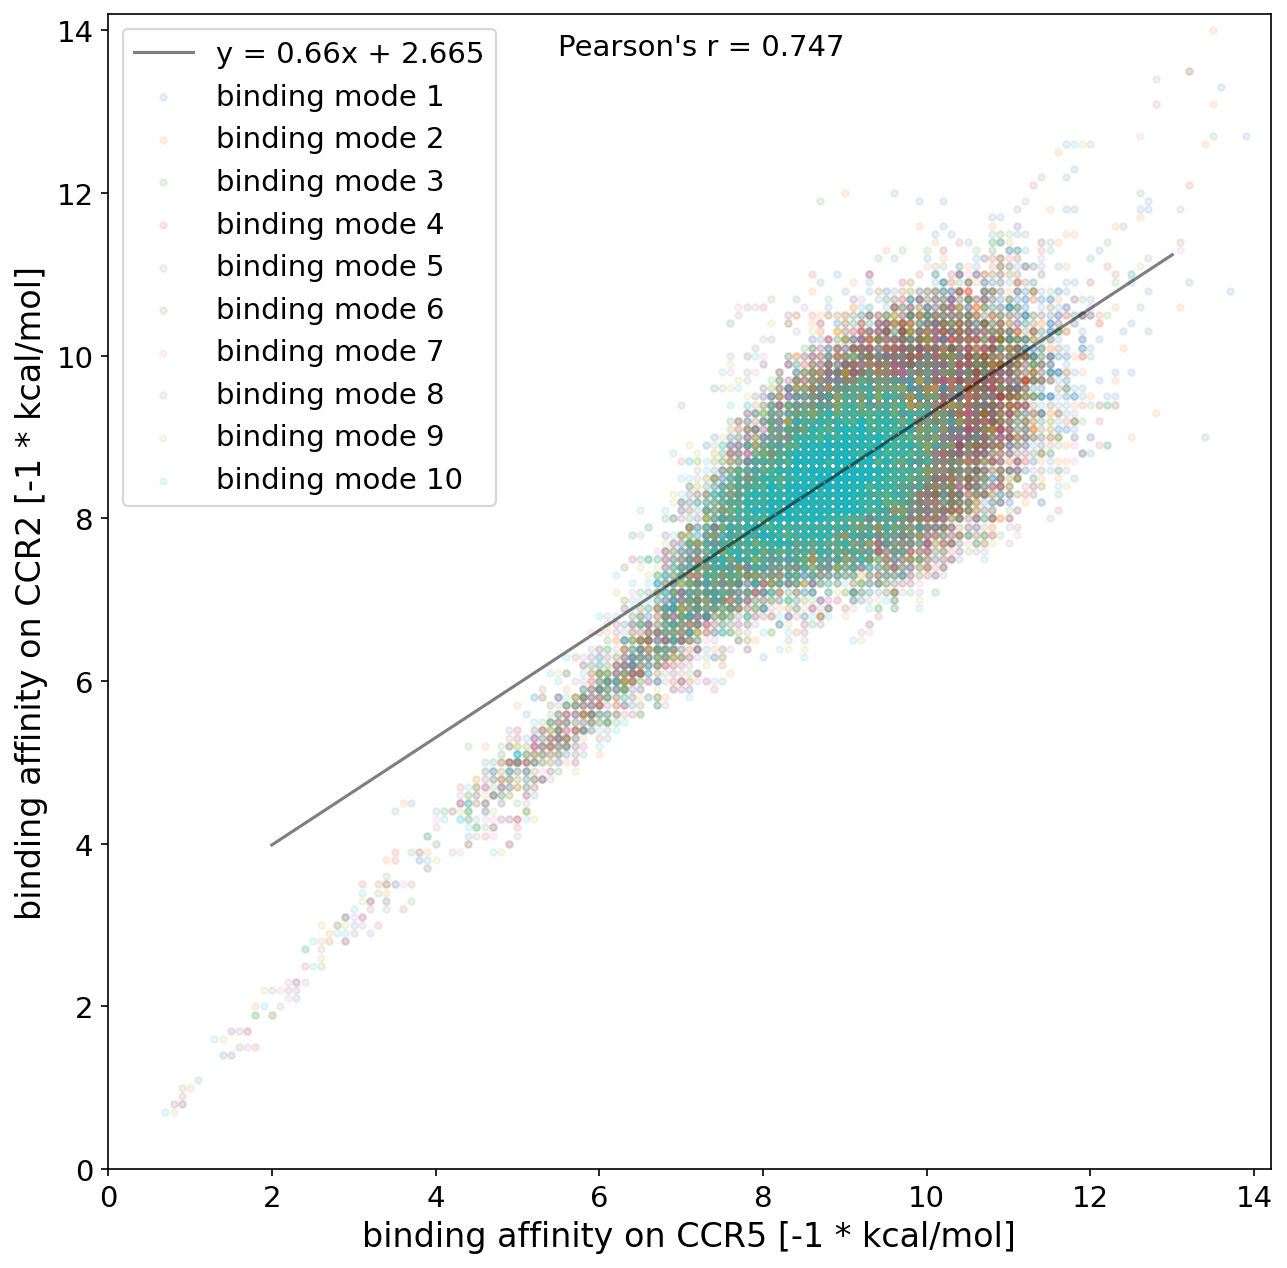

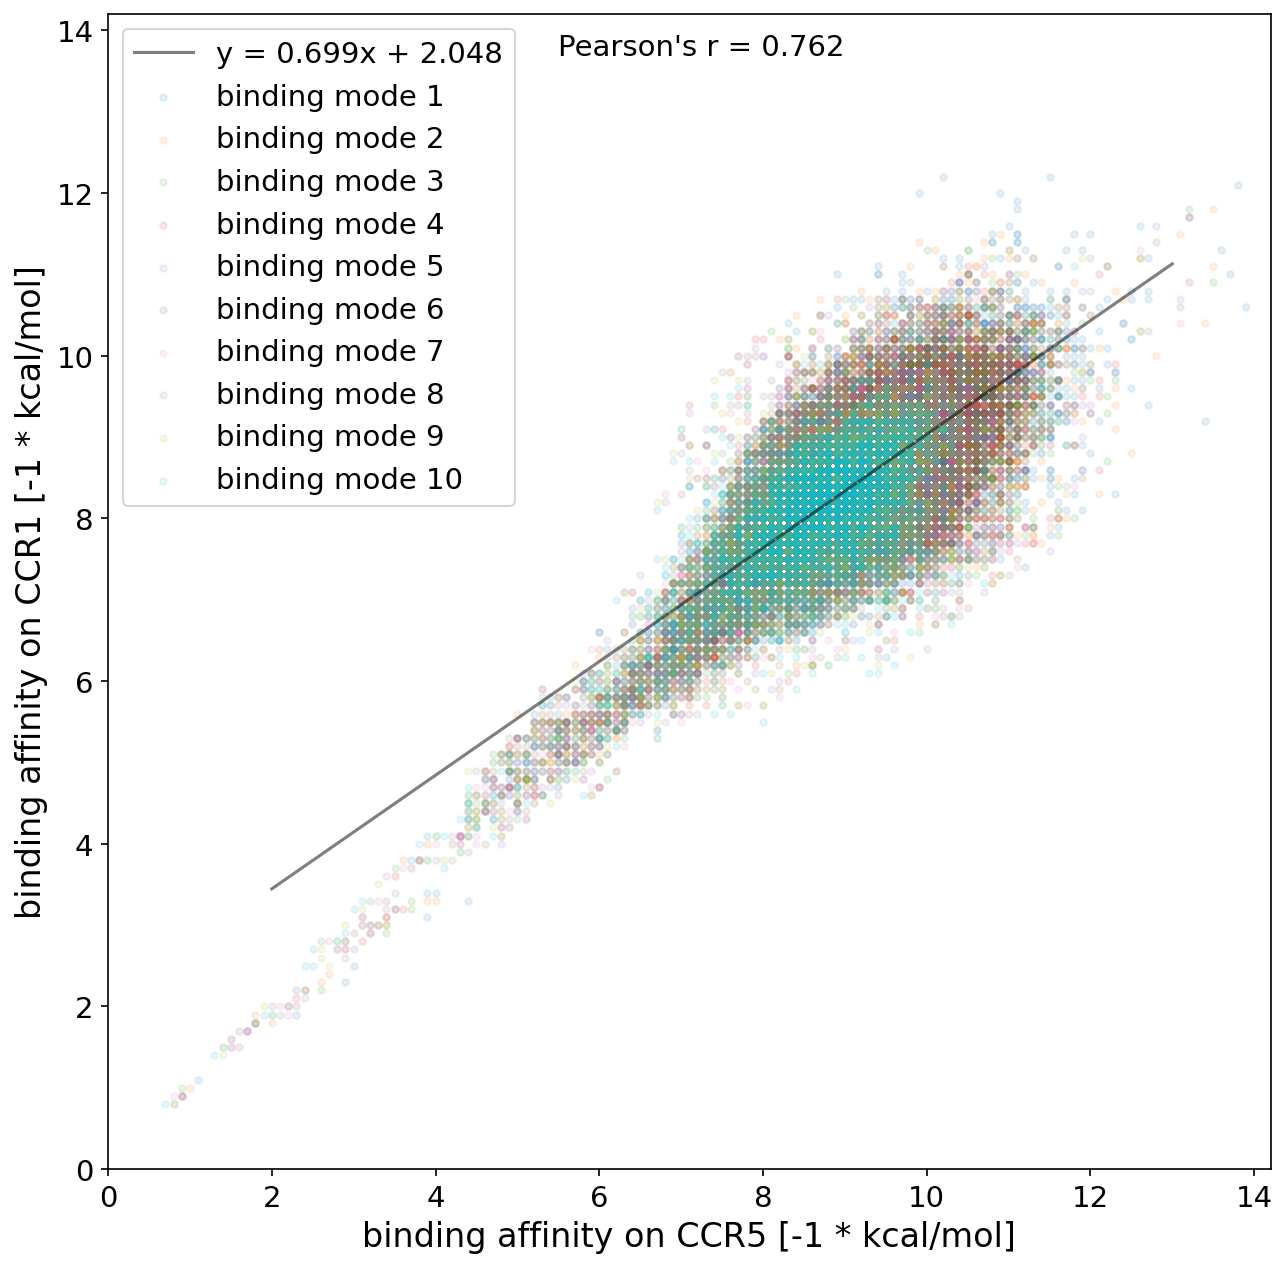

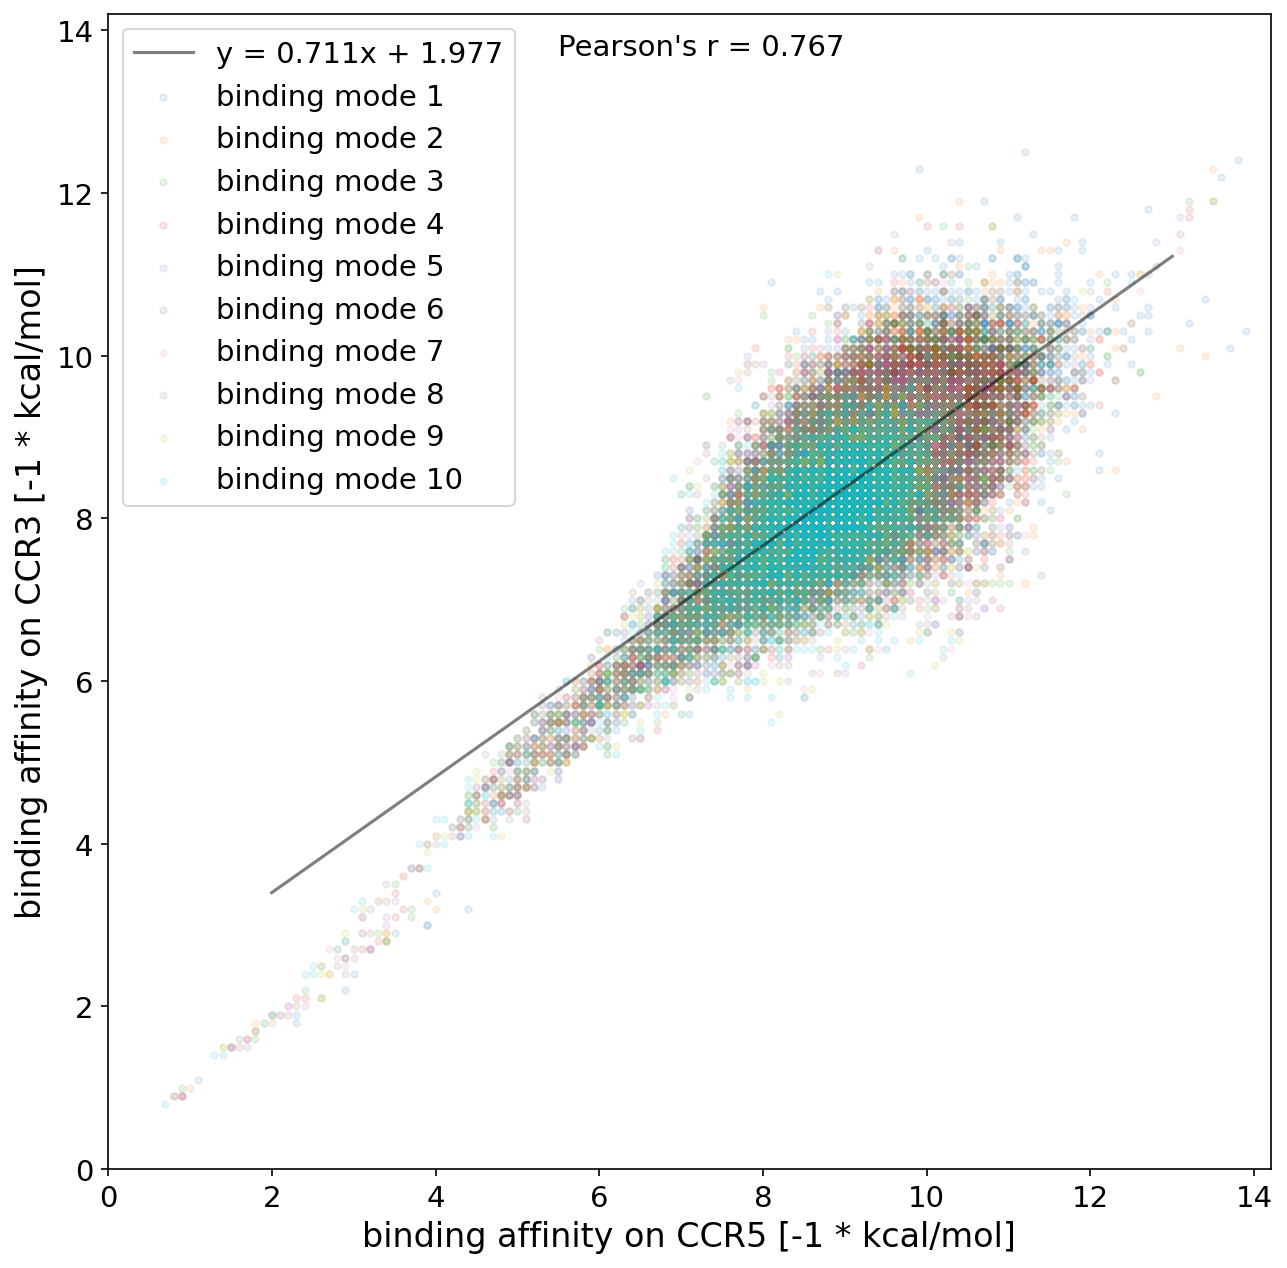

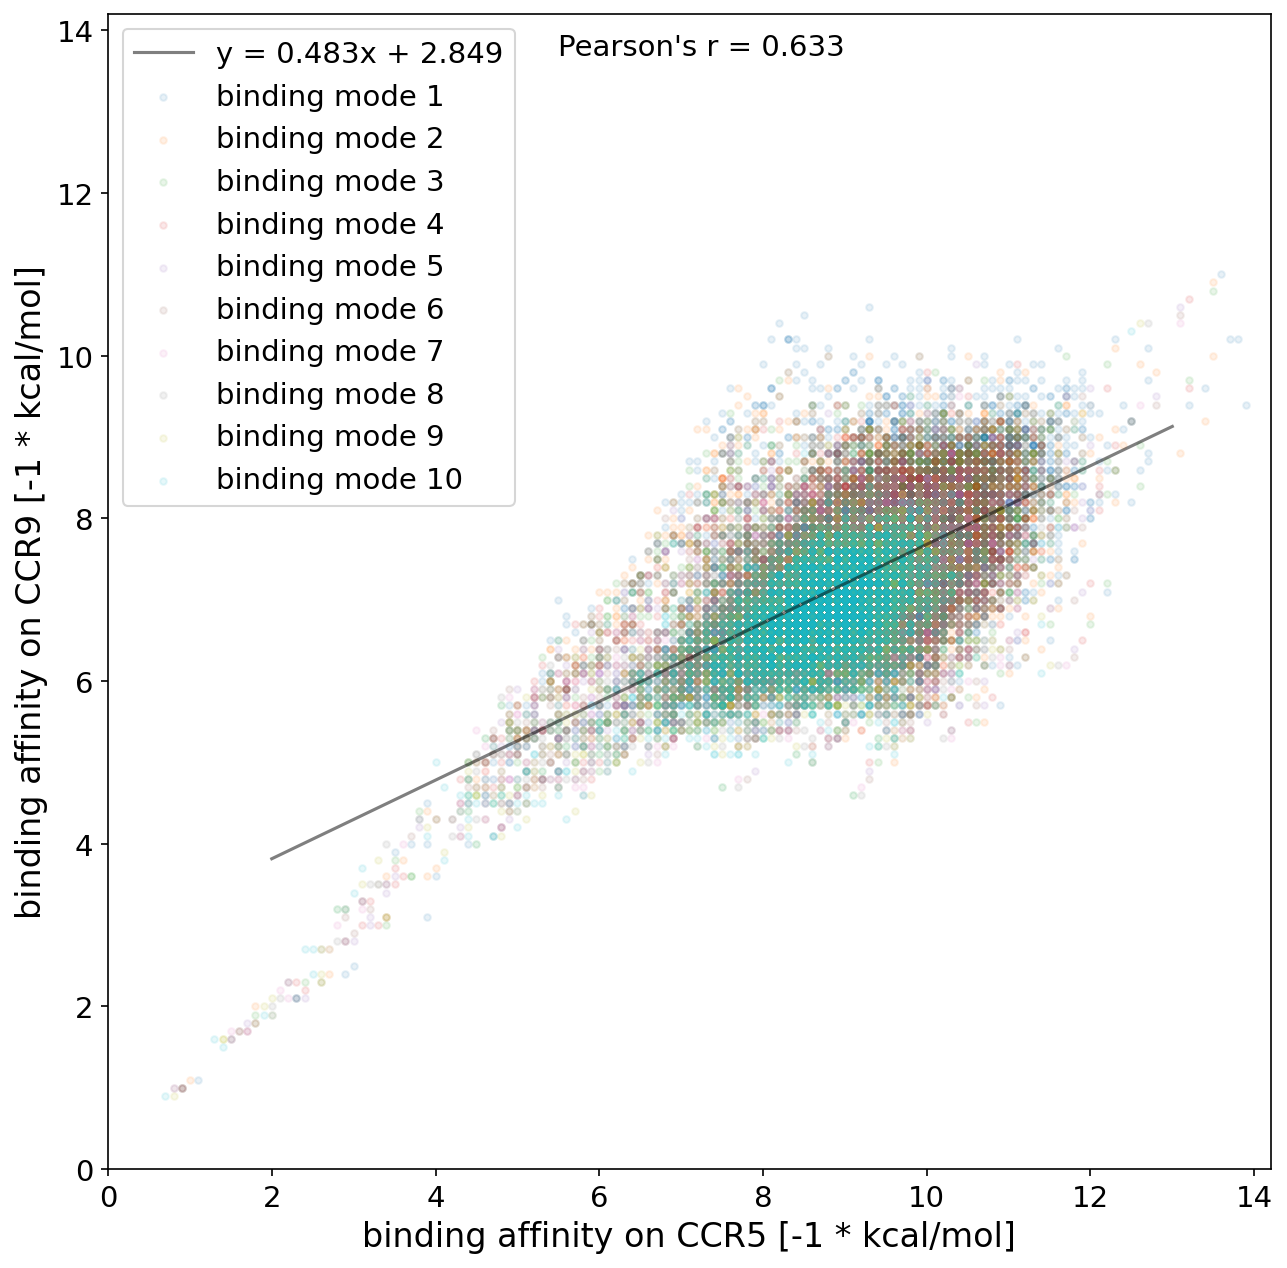

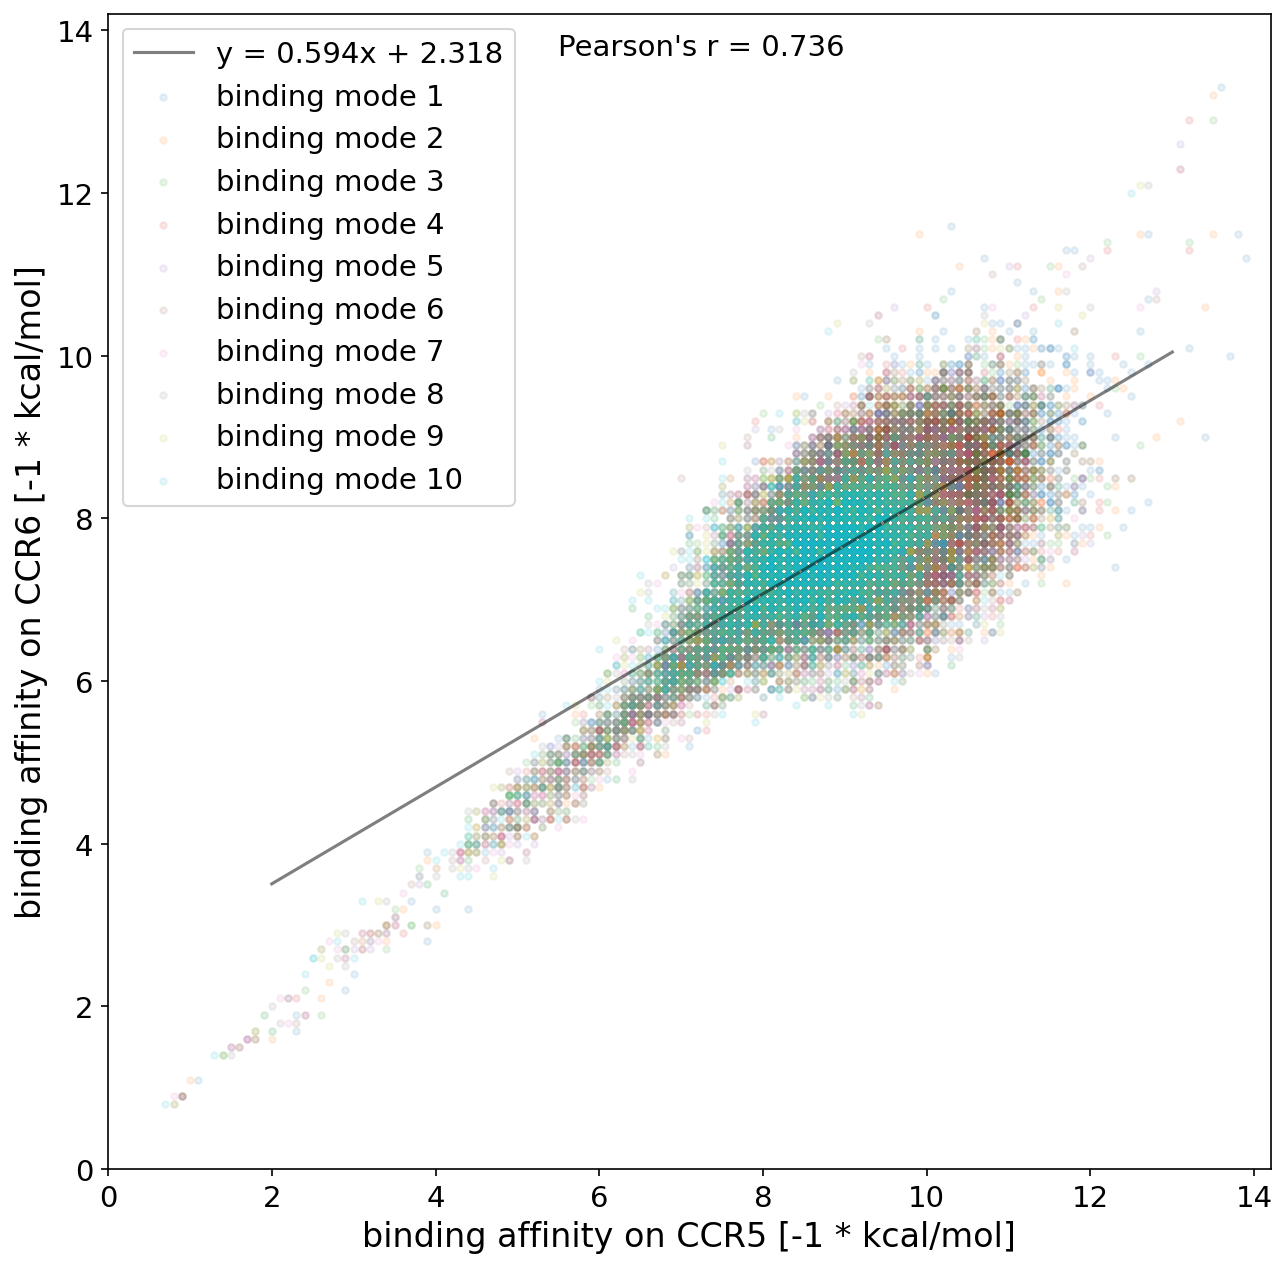

In [12]:
for offtarg in ["ccr2", "ccr1", "ccr3", "ccr9", "ccr6"]:
    combined_logs = pd.merge(logs_ccr5, eval(f"logs_{offtarg}"), on="uuid")

    plt.figure(figsize=(10, 10), dpi=150)

    x = pd.concat([combined_logs[f"affin_kcal_mol-1_{i}_x"] for i in range(1, 11)], axis=0, ignore_index=True).dropna() * (-1)
    y = pd.concat([combined_logs[f"affin_kcal_mol-1_{i}_y"] for i in range(1, 11)], axis=0, ignore_index=True).dropna() * (-1)
    idx = x.index.intersection(y.index)
    r = stats.pearsonr(x[idx], y[idx])[0]
    k, b = np.polyfit(x[idx], y[idx], 1)

    for i in range(1, 11):
        plt.scatter(
            combined_logs[f"affin_kcal_mol-1_{i}_x"] * (-1),
            combined_logs[f"affin_kcal_mol-1_{i}_y"] * (-1),
            alpha=0.1, s=10, label=f"binding mode {i}")

    plt.plot(np.arange(2, 14), k*np.arange(2, 14)+ b, color="black", alpha=0.5, label=f"y = {round(k, 3)}x + {round(b, 3)}")
    plt.xlim(0, 14.2)
    plt.ylim(0, 14.2)
    plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]", size=16)
    plt.ylabel(f"binding affinity on {offtarg.upper()} [-1 * kcal/mol]", size=16)
    plt.legend(fontsize=14)
    plt.text(x=5.5, y=13.7, s=f"Pearson's r = {round(r, 3)}", size=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    plt.savefig(plots_path / f"baff-ccr5-vs-{offtarg}.png")
    plt.show()